# Company Annual Sales Analysis
### Analysis of internal company data using pandas and matplotlib

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_excel('Cryogenic_Sales.xls',sheet_name='ORDERS AND PAYMENT INFORMATION')
df = df.drop('Name / Organisation',axis=1) #to protect customer identity
df.head(3)

,Job,Country,Agent,Eng,Magnet / System,Gross Value,ordered,Date shipped
0,3085,Germany,DIRECT,NaN,Design Study UHV STM System with Magnet & VTI,50000,2010,NaN
1,3086,New Zealand,DIRECT,NaN,3T servicing,3850,2010,06.05.10
2,3087,Turkey,DIRECT,NaN,"VSM Probe,Absorber for Sumitomo Compressor,Serv",13633,2010,05.07.10


In [3]:
df.columns

Index(['Job', 'Country', 'Agent', 'Eng', 'Magnet / System', 'Gross Value',
       'ordered', 'Date shipped'],
      dtype='object')

In [4]:
df.drop(['Agent','Eng','Date shipped'],axis=1, inplace = True)

In [5]:
df.rename(columns={'Country':'Country','Magnet / System':'System','Gross Value':'Value','ordered':'Year'},inplace=True)
df.head()

,Job,Country,System,Value,Year
0,3085,Germany,Design Study UHV STM System with Magnet & VTI,50000,2010
1,3086,New Zealand,3T servicing,3850,2010
2,3087,Turkey,"VSM Probe,Absorber for Sumitomo Compressor,Serv",13633,2010
3,3088,Italy,Pair of Power Supply Cables,228.72,2010
4,3089,Japan,"HLG200, HLP-AL1100-TL1400",688.5,2010


In [6]:
#extract numerical values from string type data and convert to integer form  
df['Value'] = df['Value'].astype(str)
df['Value'] = df['Value'].str.extract('(\d+)')
df['Value'] = df['Value'].astype(int)

In [7]:
df.head()

,Job,Country,System,Value,Year
0,3085,Germany,Design Study UHV STM System with Magnet & VTI,50000,2010
1,3086,New Zealand,3T servicing,3850,2010
2,3087,Turkey,"VSM Probe,Absorber for Sumitomo Compressor,Serv",13633,2010
3,3088,Italy,Pair of Power Supply Cables,228,2010
4,3089,Japan,"HLG200, HLP-AL1100-TL1400",688,2010


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2084 entries, 0 to 2083
Data columns (total 5 columns):
Job        2084 non-null object
Country    2084 non-null object
System     2083 non-null object
Value      2084 non-null int32
Year       2084 non-null int64
dtypes: int32(1), int64(1), object(3)
memory usage: 73.3+ KB


In [9]:
#check for missing data in the value column
df['Value'].isnull().value_counts()

False    2084
Name: Value, dtype: int64

In [10]:
#group data by country for a single year and show the ordered sum of the annual sales
sales_2020 = df[df['Year']==2020].groupby('Country')['Value'].sum()
sales2020 = sales_2020.sort_values(axis=0, ascending=False)[:11]
sales2020

Country
Hong Kong      2539833
China          1188090
Japan          1004507
UK              879579
Denmark         715620
Korea           578080
Germany         548624
France          498040
USA             282708
Switzerland     210221
Spain           200120
Name: Value, dtype: int32

Text(0.5,1,'Total Sales by Country for 2020')

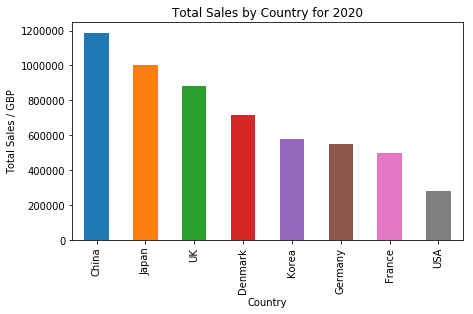

In [11]:
plt.figure(figsize=(7,4))
sales_2020.sort_values(axis=0, ascending=False)[1:9].plot.bar()
plt.xlabel('Country')
plt.ylabel('Total Sales / GBP')
plt.title("Total Sales by Country for 2020")

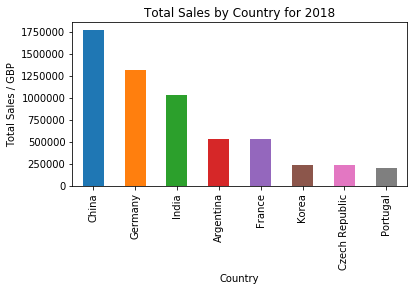

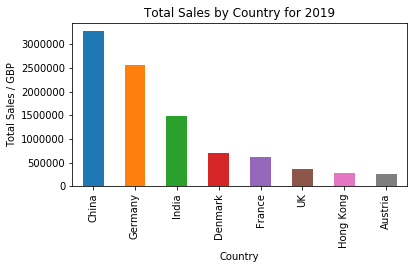

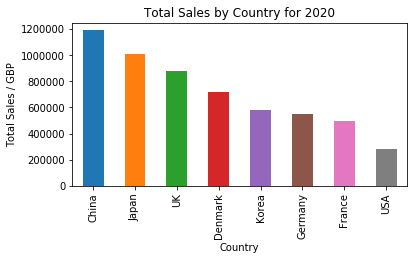

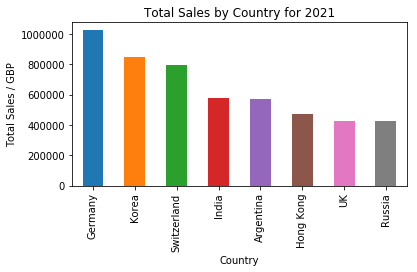

In [12]:
#plot total sales by country from 2018 to 2021
years = [2018,2019,2020,2021]
for year in years:
    sales = df[df['Year']==year].groupby('Country')['Value'].sum()
    plt.figure(figsize=(6,3))
    sales.sort_values(axis=0, ascending=False)[1:9].plot.bar(grid=False)
    plt.xlabel('Country')
    plt.ylabel('Total Sales / GBP')
    plt.title(f"Total Sales by Country for {year}")

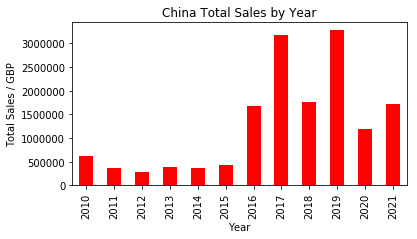

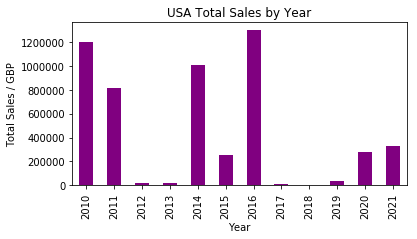

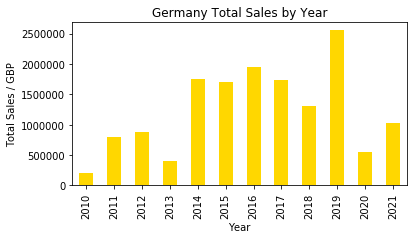

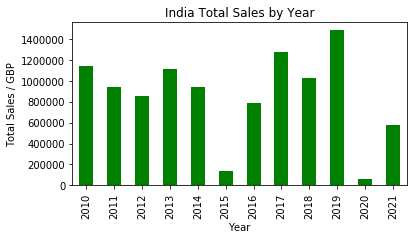

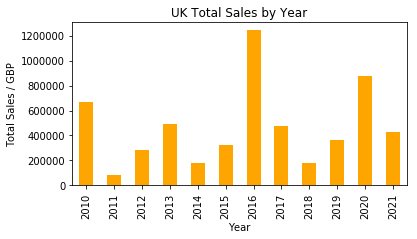

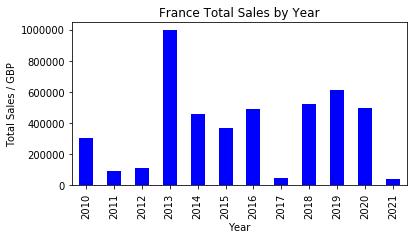

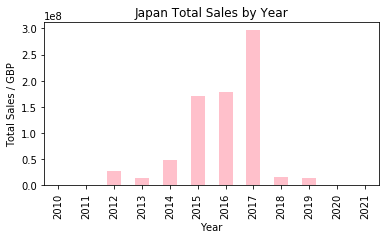

In [13]:
#create a dictionary of countries and corresponding colours and plot 
countries = {'China':'red','USA':'purple','Germany':'gold','India':'green','UK':'orange','France':'blue','Japan':'pink'}
for item in countries.keys():
    dataframe = df[df['Country']==item].groupby('Year')['Value'].sum()
    plt.figure(figsize=(6,3))
    dataframe.plot.bar(color=countries[item],grid=False)
    plt.title(f"{item} Total Sales by Year")
    plt.xlabel('Year')
    plt.ylabel('Total Sales / GBP')